# Анализ покупательской активности пользователей 👥

Интернет-магазин выявил снижение активности покупателей. Привлекать новых клиентов не эффективно, так как о магазине и так знает большая часть целевой аудитории. Возможный выход - удерживать активность постоянных клиентов. Например, с помощью персонализированных предложений.

Дано 4 датасета с различной информацией о поведении пользователей, их тратах на сайте, времени, проведенном на сайте и так далее.

Необходимо:
1) Разработать модель, которая предскажет вероятность снижения покупательской активности
2) Выделить сегмент покупателей с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности

**Содержание**<a id='toc0_'></a>    
1. [Подготовка         ](#toc1_)    
1.1. [Библиотеки         ](#toc1_1_)    
1.2. [Конфигурация        ](#toc1_2_)    
1.3. [Сервисные функции        ](#toc1_3_)    
2. [Датасет `market_file`       ](#toc2_)    
2.1. [Загрузка       ](#toc2_1_)    
2.2. [Переименование столбцов       ](#toc2_2_)    
2.3. [Проверка типов данных       ](#toc2_3_)    
2.4. [Проверка пропусков    ](#toc2_4_)    
2.5. [Проверка полных дубликатов      ](#toc2_5_)    
2.6. [Изучение столбцов      ](#toc2_6_)    
2.6.1. [Столбец `purchasing_activity`     ](#toc2_6_1_)    
2.6.2. [Столбец `service_type`     ](#toc2_6_2_)    
2.6.3. [Столбец `is_mailing_allowed`    ](#toc2_6_3_)    
2.6.4. [Столбец `marketing_activity_6_months`    ](#toc2_6_4_)    
2.6.5. [Столбец `marketing_activity_current_month`    ](#toc2_6_5_)    
2.6.6. [Столбец `days_after_registration`    ](#toc2_6_6_)    
2.6.7. [Столбец `sale_purchases_part`    ](#toc2_6_7_)    
2.6.8. [Столбец `categories_visited_per_session`    ](#toc2_6_8_)    
2.6.9. [Столбец `most_popular_category`    ](#toc2_6_9_)    
2.6.10. [Столбец `fail_number`    ](#toc2_6_10_)    
2.6.11. [Столбец `pages_per_session`    ](#toc2_6_11_)    
2.7. [Вывод по датасету `market_file`    ](#toc2_7_)    
3. [Датасет `market_money`       ](#toc3_)    
3.1. [Переименование колонок       ](#toc3_1_)    
3.2. [Проверка типов данных    ](#toc3_2_)    
3.3. [Проверка полных дубликатов    ](#toc3_3_)    
3.4. [Проверка пропусков    ](#toc3_4_)    
3.5. [Изучение столбцов   ](#toc3_5_)    
3.5.1. [Столбец `period`    ](#toc3_5_1_)    
3.5.2. [Столбец `revenue`    ](#toc3_5_2_)    
3.6. [Промежуточный вывод по столбцу `market_money`    ](#toc3_6_)    
4. [Датасет `market_time`       ](#toc4_)    
4.1. [Переименование колонок       ](#toc4_1_)    
4.2. [Проверка пропусков    ](#toc4_2_)    
4.3. [Проверка полных дубликатов    ](#toc4_3_)    
4.4. [Столбец `period`    ](#toc4_4_)    
4.5. [Промежуточный вывод о датасете `market_time`    ](#toc4_5_)    
5. [Датасет `money`       ](#toc5_)    
5.1. [Переименование столбцов       ](#toc5_1_)    
5.2. [Проверка типов данных       ](#toc5_2_)    
5.3. [Проверка полных дубликатов    ](#toc5_3_)    
5.4. [Изучение пропусков       ](#toc5_4_)    
5.5. [Столбец `profit`  ](#toc5_5_)    
5.6. [Вывод о датасете `money` ](#toc5_6_)    
6. [Преобразование таблиц    ](#toc6_)    
7. [Отбор клиентов    ](#toc7_)    
8. [Объединение таблиц    ](#toc8_)    
9. [Проверка корреляции    ](#toc9_)    
10. [Предобработка и Модели    ](#toc10_)    
10.1. [Разделение данных    ](#toc10_1_)    
10.2. [Пайплайны    ](#toc10_2_)    
10.3. [Вывод ](#toc10_3_)    
11. [Анализ важности признаков    ](#toc11_)    
12. [Сегментация покупателей    ](#toc12_)    
12.1. [Вывод по сегментации    ](#toc12_1_)    
13. [Общий вывод    ](#toc13_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>Подготовка          [&#8593;](#toc0_)

### 1.1. <a id='toc1_1_'></a>Библиотеки          [&#8593;](#toc0_)

In [1]:
from IPython.display import clear_output

In [2]:
from platform import python_version
version = python_version()

if version.startswith('3.9'):  
    pass
    %pip install --force-reinstall -v "numpy==1.22.4" -q
else: 
    pass
    %pip install --upgrade numpy -q   

%pip install --force-reinstall -v "matplotlib==3.8.0" -q

%pip install --upgrade phik -q
%pip install --upgrade prettytable -q
%pip install --upgrade termcolor -q
%pip install --upgrade seaborn -q
%pip install --upgrade pandas -q
%pip install --upgrade statsmodels -q
%pip install --upgrade scikit-learn -q
%pip install --upgrade shap -q

clear_output()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from os.path import exists
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder)
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV)
from phik import phik_matrix  # this import IS accessed
from prettytable import PrettyTable
from termcolor import colored
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### 1.2. <a id='toc1_2_'></a>Конфигурация         [&#8593;](#toc0_)

In [4]:
RANDOM_STATE = 27
TEST_SIZE = 0.25


pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)

### 1.3. <a id='toc1_3_'></a>Сервисные функции         [&#8593;](#toc0_)

In [5]:
def print_table_about_nans(data: pd.DataFrame) -> None:
    table = PrettyTable()
    table.field_names = ['Feature', 'Missing values count']
    
    missing_info = data.isna().sum().sort_values()
    cols = missing_info.index.to_list()
    for col in cols:
        count = missing_info[col]
        color = 'green' if count == 0 else 'red'
        s = f'{count} ({count / len(data):.2%})'
        table.add_row([col, colored(s, color)])
    
    print(table)

In [6]:
def draw_plots_about_column(df: pd.DataFrame,
                            column: str,
                            column_description: str,
                            bins: int = 20
                            ) -> None:
    _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    sns.violinplot(df, x=column, ax=ax1, orient='h')
    ax1.set_xlabel(column_description)
    ax1.grid()
    
    sns.boxplot(df, x=column, ax=ax2)
    ax2.set_xlabel(column_description)
    ax2.grid()
    
    sns.histplot(df, x=column, bins=bins, ax=ax3)
    ax3.set_xlabel(column_description)
    ax3.grid()
    ax3.set_ylabel('Количество')
    
    ax4.set_visible(False)
    
    plt.suptitle(f'Информация о колонке `{column_description}`', fontsize=18)
    plt.tight_layout()

    plt.show()

In [7]:
def plot_pie_chart(series: pd.Series, title: str) -> None:
    _table = series.value_counts()
    data, labels = _table.values, _table.index
    plt.pie(data, labels=labels, autopct='%.0f%%')
    plt.title(title)
    plt.show()

## 2. <a id='toc2_'></a>Датасет `market_file`        [&#8593;](#toc0_)

### 2.1. <a id='toc2_1_'></a>Загрузка        [&#8593;](#toc0_)

In [8]:
# data is not presented due to copyright
market_file = pd.read_csv('')

In [9]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2


### 2.2. <a id='toc2_2_'></a>Переименование столбцов        [&#8593;](#toc0_)

Названия столбцов не соответствуют стилистике и PEP8. Переведем их на английский язык и оформим в snake_case. 

In [10]:
market_file.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [11]:
market_file = market_file.rename(columns={
    'Покупательская активность': 'purchasing_activity',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'is_mailing_allowed',
    'Маркет_актив_6_мес': 'marketing_activity_6_months',
    'Маркет_актив_тек_мес': 'marketing_activity_current_month',
    'Длительность': 'days_after_registration',
    'Акционные_покупки': 'sale_purchases_part',
    'Популярная_категория': 'most_popular_category',
    'Средний_просмотр_категорий_за_визит': 'categories_visited_per_session',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_items_number',
    'Ошибка_сервиса': 'fail_number',
    'Страниц_за_визит': 'pages_per_session'
}, errors='raise')

In [12]:
market_file.columns

Index(['id', 'purchasing_activity', 'service_type', 'is_mailing_allowed',
       'marketing_activity_6_months', 'marketing_activity_current_month',
       'days_after_registration', 'sale_purchases_part',
       'most_popular_category', 'categories_visited_per_session',
       'unpaid_items_number', 'fail_number', 'pages_per_session'],
      dtype='object')

### 2.3. <a id='toc2_3_'></a>Проверка типов данных        [&#8593;](#toc0_)

In [13]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1300 non-null   int64  
 1   purchasing_activity               1300 non-null   object 
 2   service_type                      1300 non-null   object 
 3   is_mailing_allowed                1300 non-null   object 
 4   marketing_activity_6_months       1300 non-null   float64
 5   marketing_activity_current_month  1300 non-null   int64  
 6   days_after_registration           1300 non-null   int64  
 7   sale_purchases_part               1300 non-null   float64
 8   most_popular_category             1300 non-null   object 
 9   categories_visited_per_session    1300 non-null   int64  
 10  unpaid_items_number               1300 non-null   int64  
 11  fail_number                       1300 non-null   int64  
 12  pages_

### 2.4. <a id='toc2_4_'></a>Проверка пропусков     [&#8593;](#toc0_)

In [14]:
print_table_about_nans(market_file)

+----------------------------------+----------------------+
|             Feature              | Missing values count |
+----------------------------------+----------------------+
|                id                |      0 (0.00%)       |
|       purchasing_activity        |      0 (0.00%)       |
|           service_type           |      0 (0.00%)       |
|        is_mailing_allowed        |      0 (0.00%)       |
|   marketing_activity_6_months    |      0 (0.00%)       |
| marketing_activity_current_month |      0 (0.00%)       |
|     days_after_registration      |      0 (0.00%)       |
|       sale_purchases_part        |      0 (0.00%)       |
|      most_popular_category       |      0 (0.00%)       |
|  categories_visited_per_session  |      0 (0.00%)       |
|       unpaid_items_number        |      0 (0.00%)       |
|           fail_number            |      0 (0.00%)       |
|        pages_per_session         |      0 (0.00%)       |
+----------------------------------+----

### 2.5. <a id='toc2_5_'></a>Проверка полных дубликатов       [&#8593;](#toc0_)

In [15]:
market_file.duplicated().sum()

0

### 2.6. <a id='toc2_6_'></a>Изучение столбцов       [&#8593;](#toc0_)

#### 2.6.1. <a id='toc2_6_1_'></a>Столбец `purchasing_activity`      [&#8593;](#toc0_)

In [16]:
market_file['purchasing_activity'].value_counts()

purchasing_activity
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

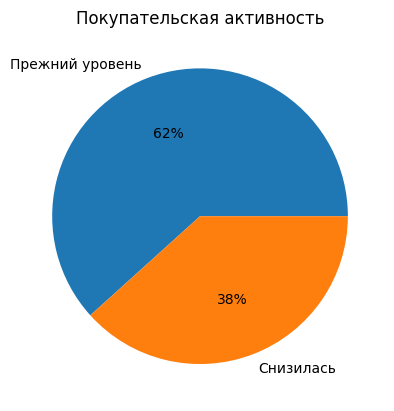

In [17]:
plot_pie_chart(market_file['purchasing_activity'], 'Покупательская активность')

#### 2.6.2. <a id='toc2_6_2_'></a>Столбец `service_type`      [&#8593;](#toc0_)

In [18]:
market_file['service_type'].value_counts()

service_type
стандарт     914
премиум      376
стандартт     10
Name: count, dtype: int64

In [19]:
market_file['service_type'] = market_file['service_type'].replace({
    'стандартт': 'стандарт'
})

In [20]:
market_file['service_type'].value_counts()

service_type
стандарт    924
премиум     376
Name: count, dtype: int64

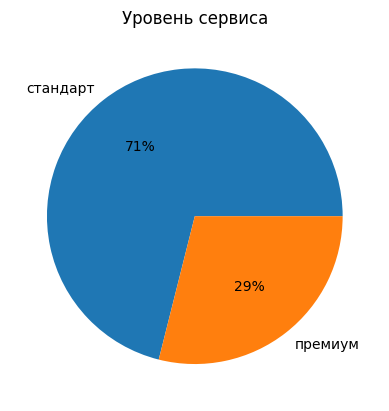

In [21]:
plot_pie_chart(market_file['service_type'], 'Уровень сервиса')

#### 2.6.3. <a id='toc2_6_3_'></a>Столбец `is_mailing_allowed`     [&#8593;](#toc0_)

In [22]:
market_file['is_mailing_allowed'].value_counts()

is_mailing_allowed
да     962
нет    338
Name: count, dtype: int64

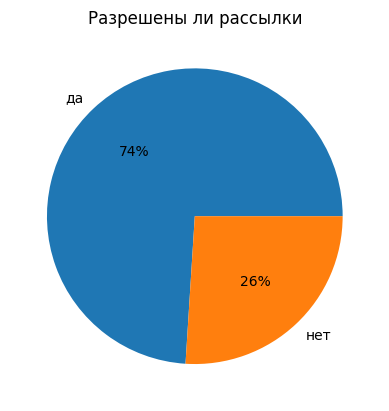

In [23]:
plot_pie_chart(market_file['is_mailing_allowed'], 'Разрешены ли рассылки')

#### 2.6.4. <a id='toc2_6_4_'></a>Столбец `marketing_activity_6_months`     [&#8593;](#toc0_)

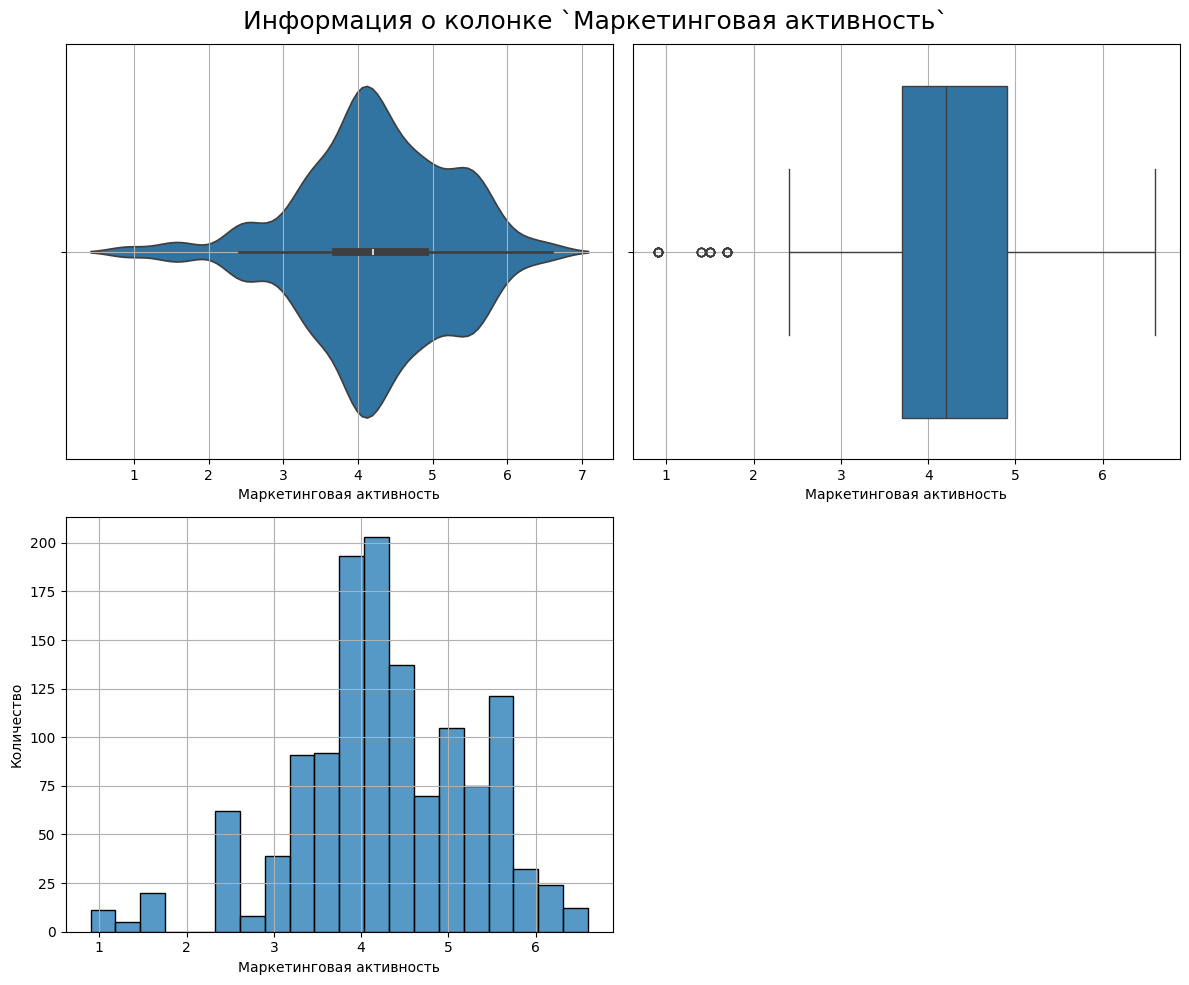

In [24]:
draw_plots_about_column(
    market_file,
    'marketing_activity_6_months',
    'Маркетинговая активность'
)

#### 2.6.5. <a id='toc2_6_5_'></a>Столбец `marketing_activity_current_month`     [&#8593;](#toc0_)

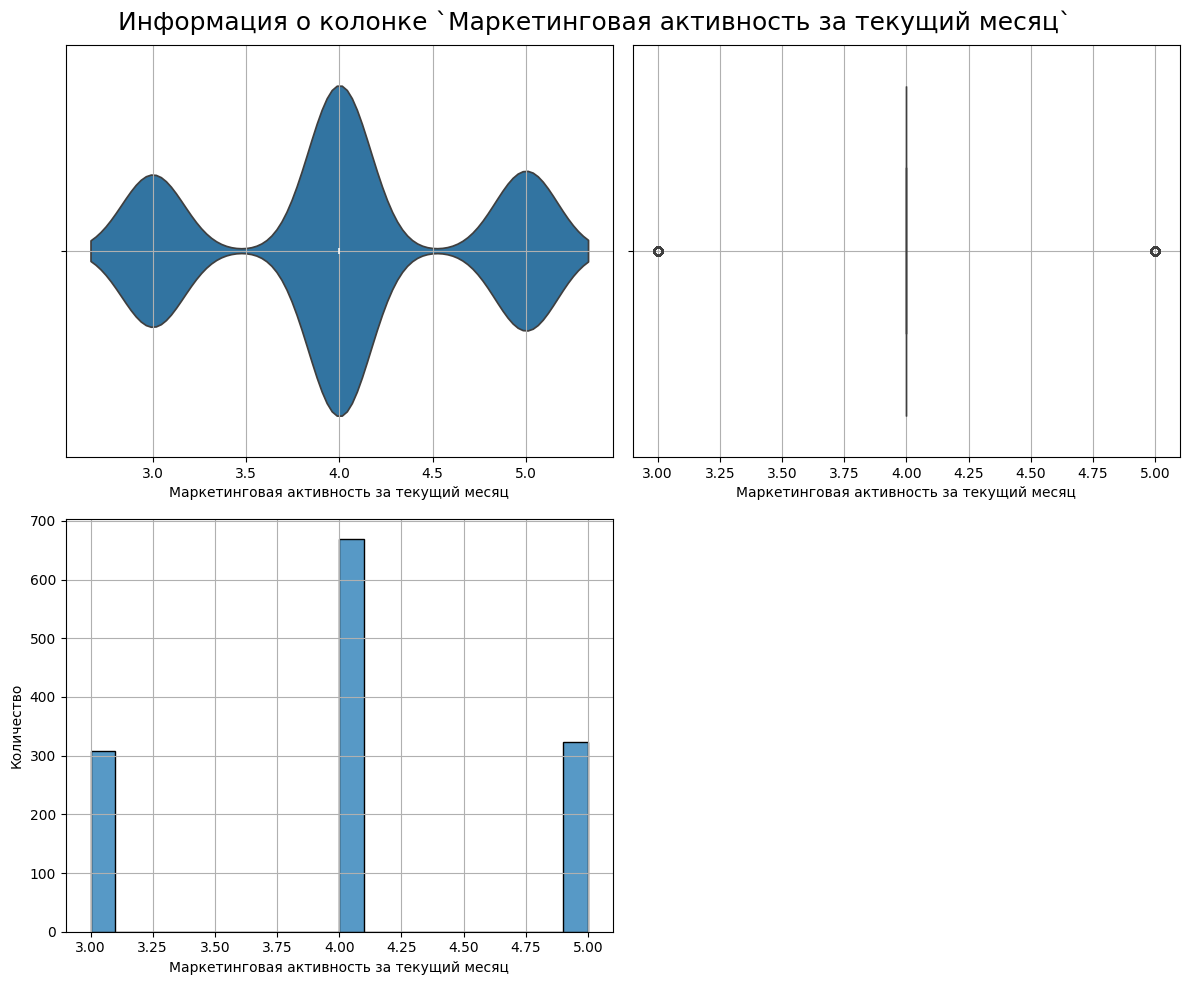

In [25]:
draw_plots_about_column(
    market_file,
    'marketing_activity_current_month',
    'Маркетинговая активность за текущий месяц'
)

#### 2.6.6. <a id='toc2_6_6_'></a>Столбец `days_after_registration`     [&#8593;](#toc0_)

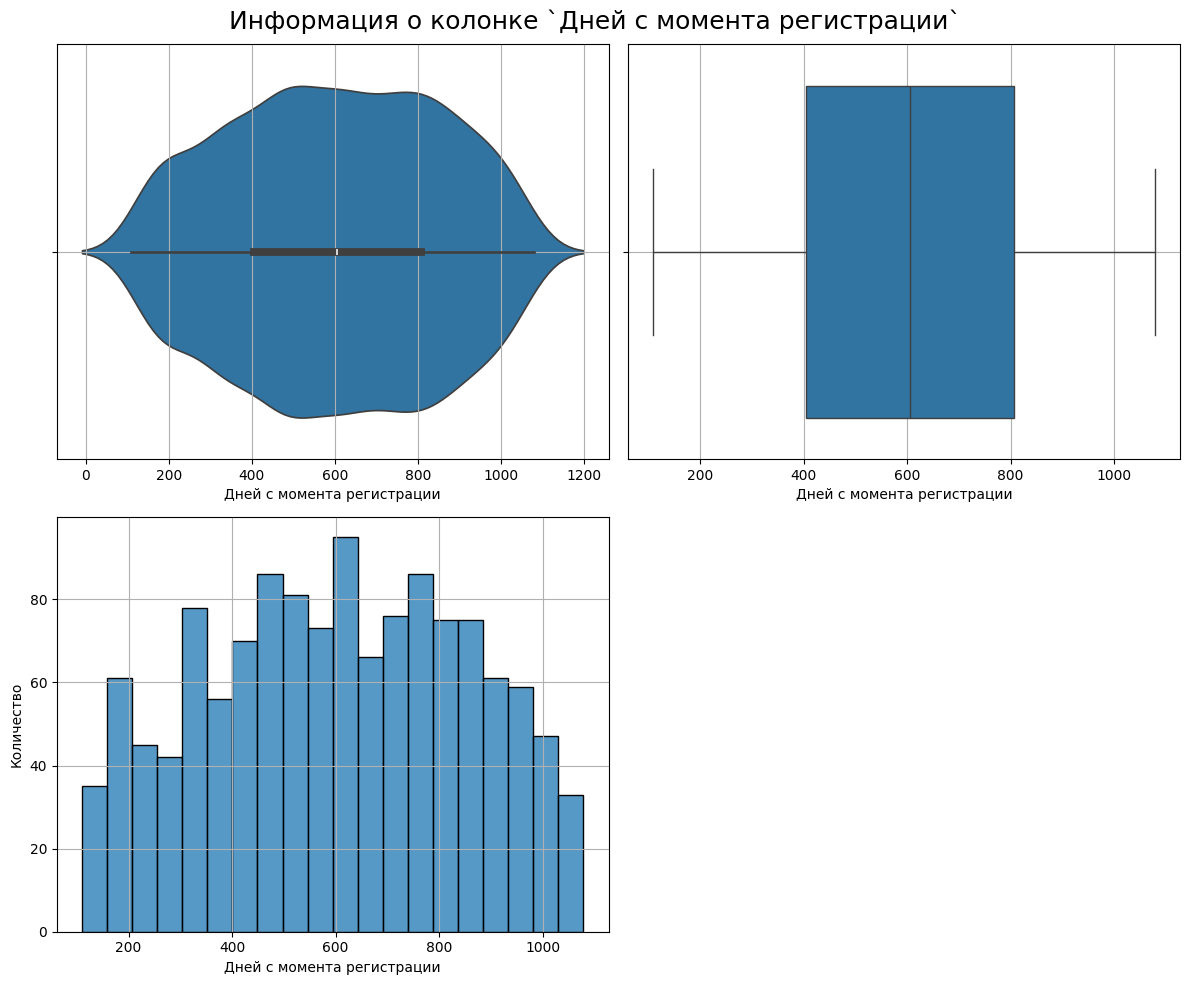

In [26]:
draw_plots_about_column(
    market_file,
    'days_after_registration',
    'Дней с момента регистрации'
)

#### 2.6.7. <a id='toc2_6_7_'></a>Столбец `sale_purchases_part`     [&#8593;](#toc0_)

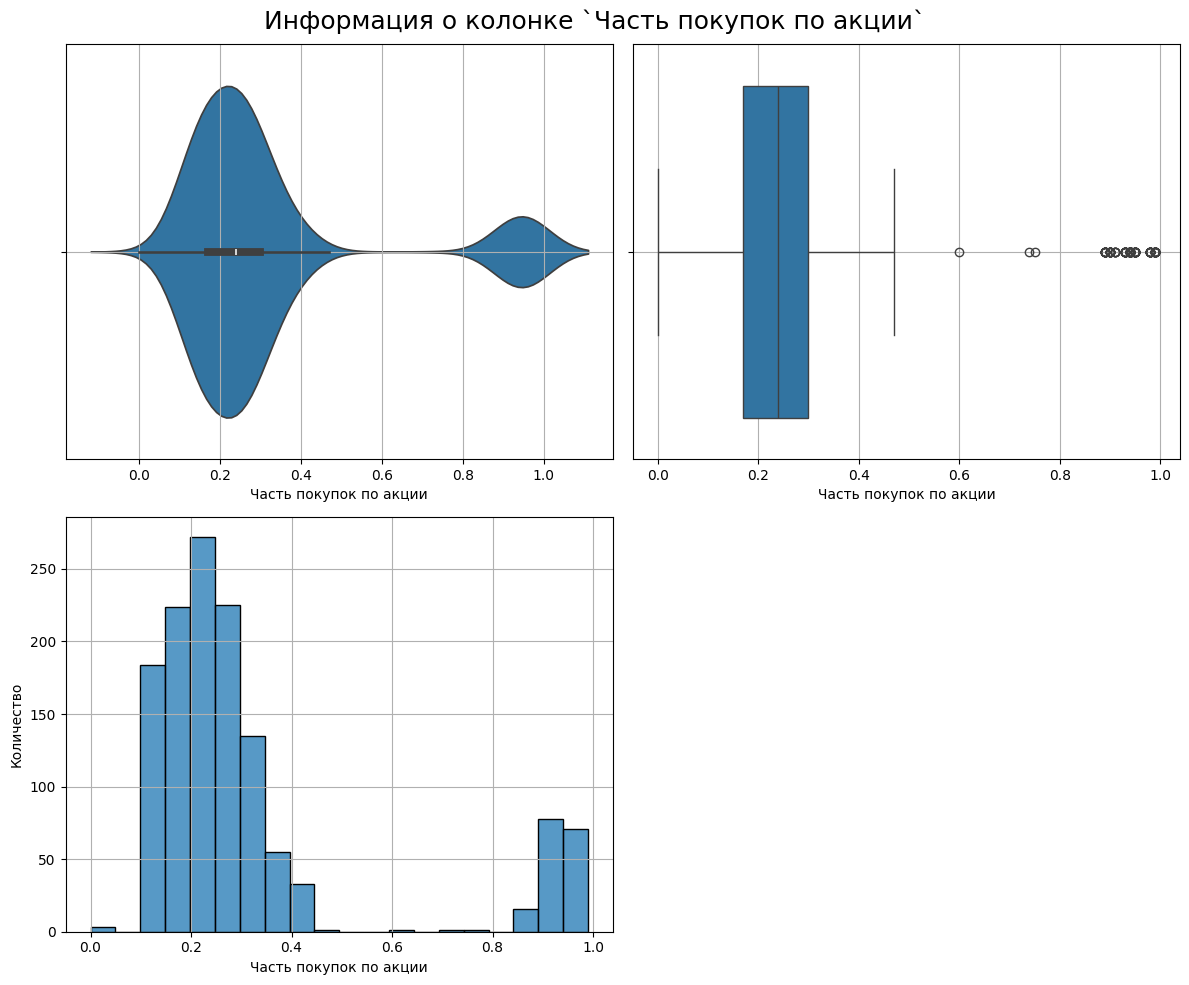

In [27]:
draw_plots_about_column(
    market_file,
    'sale_purchases_part',
    'Часть покупок по акции')

#### 2.6.8. <a id='toc2_6_8_'></a>Столбец `categories_visited_per_session`     [&#8593;](#toc0_)

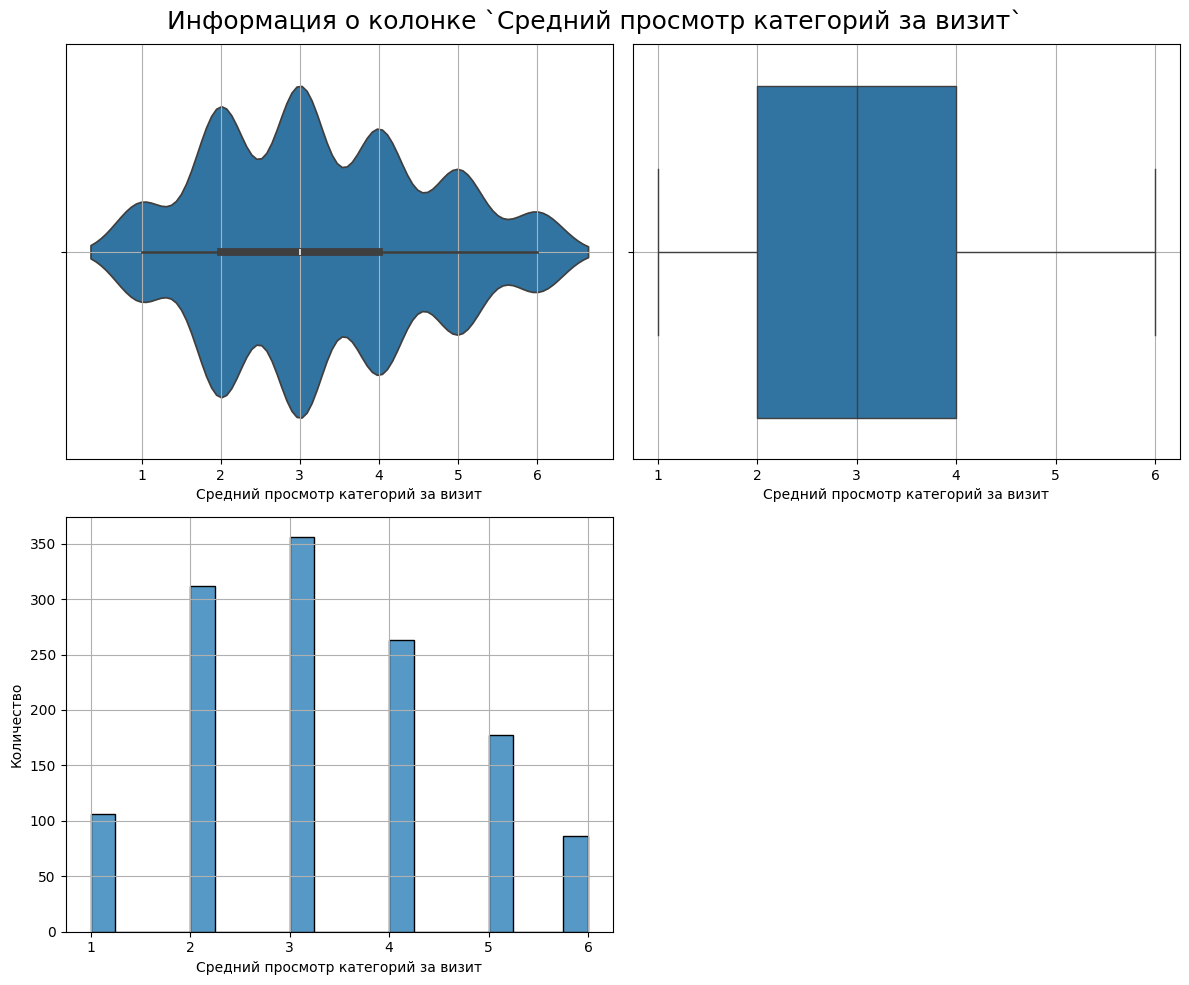

In [28]:
draw_plots_about_column(
    market_file,
    'categories_visited_per_session',
    'Средний просмотр категорий за визит'
)

#### 2.6.9. <a id='toc2_6_9_'></a>Столбец `most_popular_category`     [&#8593;](#toc0_)

In [29]:
market_file['most_popular_category'].value_counts()

most_popular_category
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

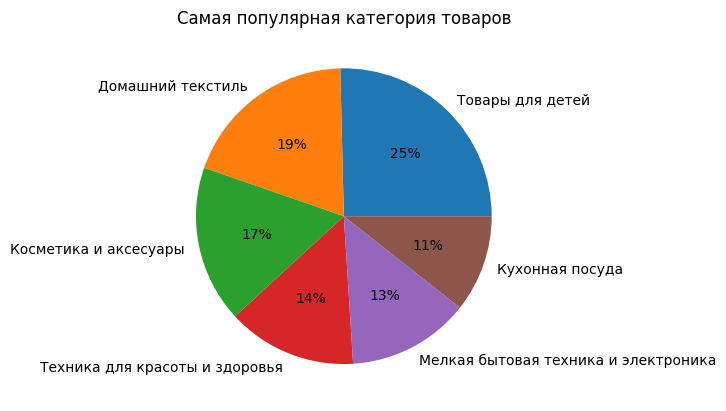

In [30]:
plot_pie_chart(market_file['most_popular_category'], 'Самая популярная категория товаров')

#### 2.6.10. <a id='toc2_6_10_'></a>Столбец `fail_number`     [&#8593;](#toc0_)

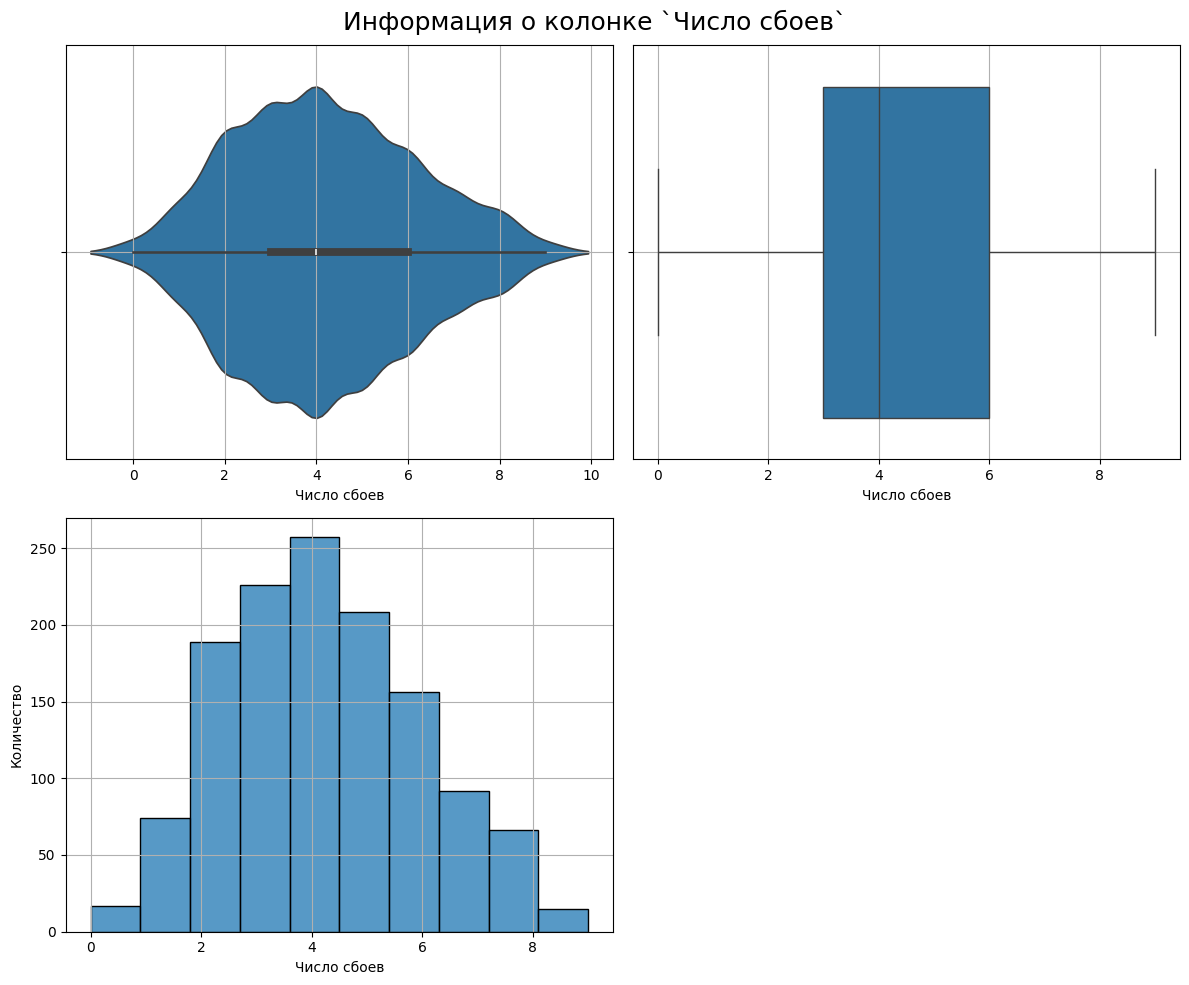

In [31]:
draw_plots_about_column(
    market_file,
    'fail_number',
    'Число сбоев',
    bins=10
)

#### 2.6.11. <a id='toc2_6_11_'></a>Столбец `pages_per_session`     [&#8593;](#toc0_)

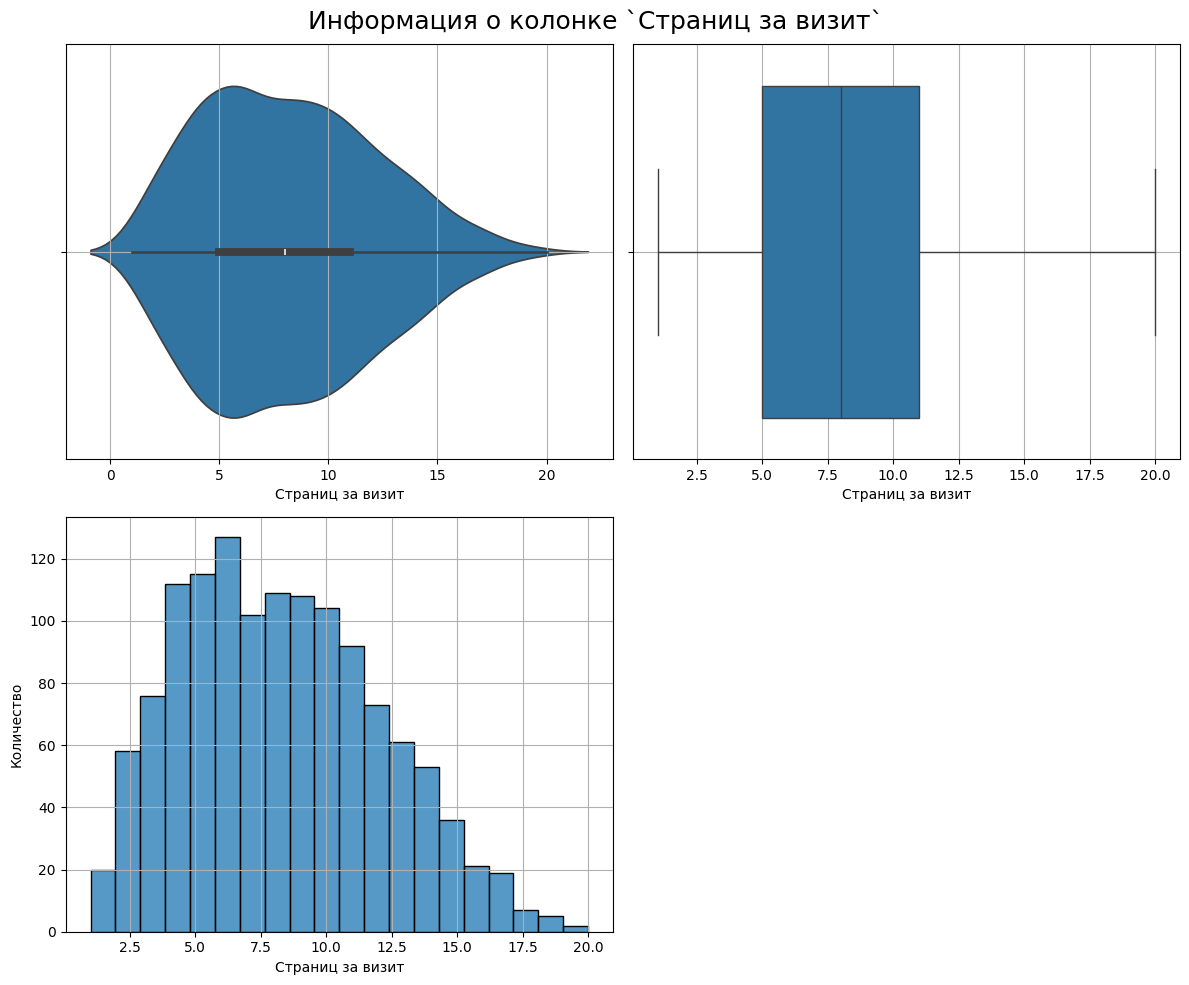

In [32]:
draw_plots_about_column(
    market_file,
    'pages_per_session',
    'Страниц за визит'
)

### 2.7. <a id='toc2_7_'></a>Вывод по датасету `market_file`     [&#8593;](#toc0_)

Датасет содержит информацию о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- Полные дубликаты отсутствуют
- Пропуски отсутствуют
- Исправлены опечатки
- Присутствуют как категориальные, так и числовые столбцы
- Выбросы отсутствуют

## 3. <a id='toc3_'></a>Датасет `market_money`        [&#8593;](#toc0_)

In [33]:
# data is not presented due to copyright
market_money = pd.read_csv('')

In [34]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,3293.10
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,4472.00
4,215349,текущий_месяц,4971.60


### 3.1. <a id='toc3_1_'></a>Переименование колонок        [&#8593;](#toc0_)

In [35]:
market_money = market_money.rename(columns={
    'Период': 'period',
    'Выручка': 'revenue'
})

### 3.2. <a id='toc3_2_'></a>Проверка типов данных     [&#8593;](#toc0_)

In [36]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


### 3.3. <a id='toc3_3_'></a>Проверка полных дубликатов     [&#8593;](#toc0_)

In [37]:
market_money.duplicated().sum()

0

### 3.4. <a id='toc3_4_'></a>Проверка пропусков     [&#8593;](#toc0_)

In [38]:
print_table_about_nans(market_money)

+---------+----------------------+
| Feature | Missing values count |
+---------+----------------------+
|    id   |      0 (0.00%)       |
|  period |      0 (0.00%)       |
| revenue |      0 (0.00%)       |
+---------+----------------------+


### 3.5. <a id='toc3_5_'></a>Изучение столбцов    [&#8593;](#toc0_)

#### 3.5.1. <a id='toc3_5_1_'></a>Столбец `period`     [&#8593;](#toc0_)

In [39]:
market_money['period'].value_counts()

period
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

#### 3.5.2. <a id='toc3_5_2_'></a>Столбец `revenue`     [&#8593;](#toc0_)

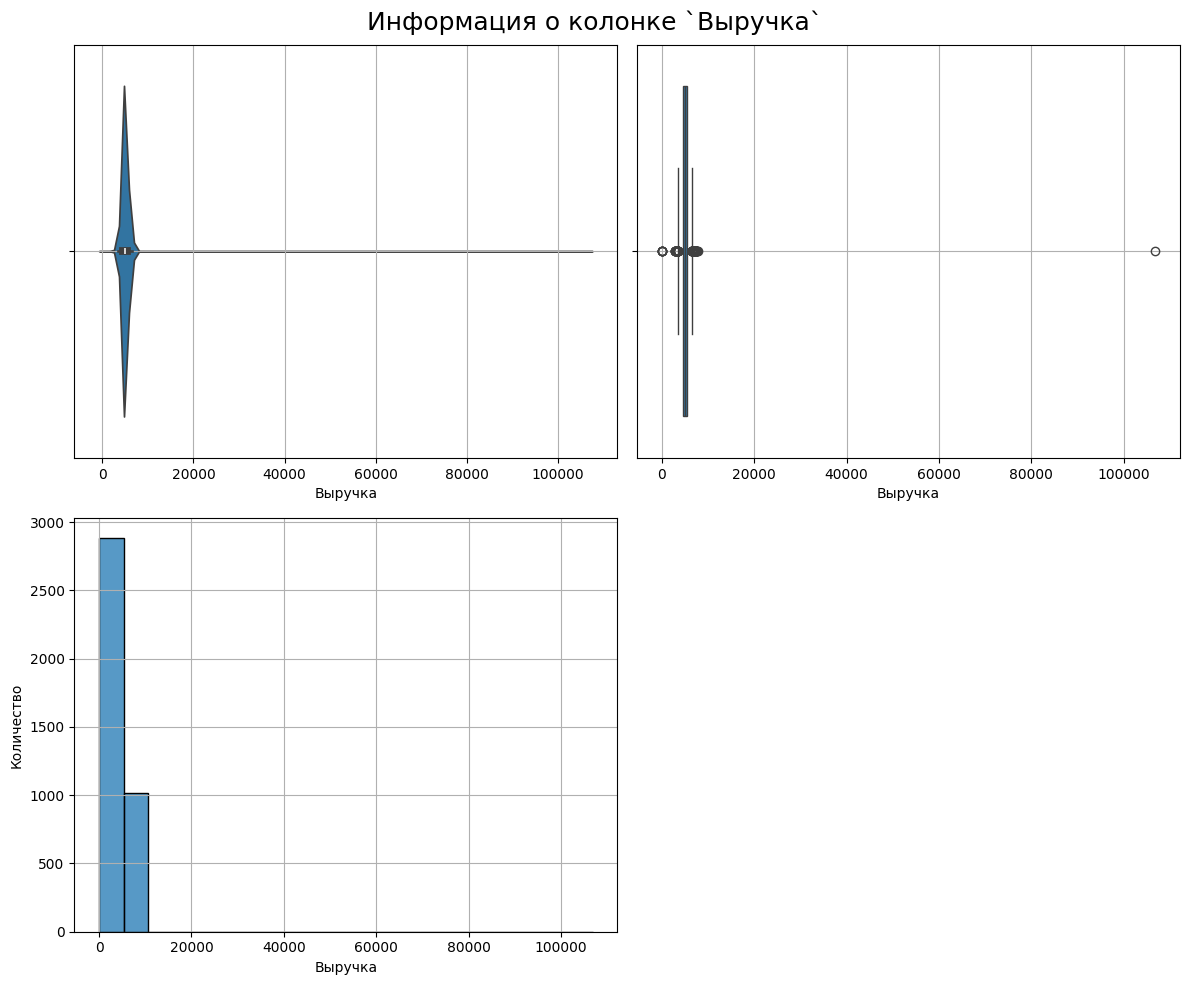

In [40]:
draw_plots_about_column(market_money, 'revenue', 'Выручка')

In [41]:
_mask = market_money['revenue'] > 100_000
market_money[_mask]

,id,period,revenue
98,215380,текущий_месяц,106862.20


In [42]:
_mask = market_money['id'] == 215380
market_money[_mask]

,id,period,revenue
96,215380,препредыдущий_месяц,5051.00
97,215380,предыдущий_месяц,6077.00
98,215380,текущий_месяц,106862.20


Данный пользователь крайне сильно выбивается из общей картины. Удалим данные о нем.

In [43]:
id_to_drop = 215380
_mask = market_money['id'] != id_to_drop
market_money = market_money[_mask]

In [44]:
_mask = market_money['revenue'] > 100_000
market_money[_mask]

,id,period,revenue


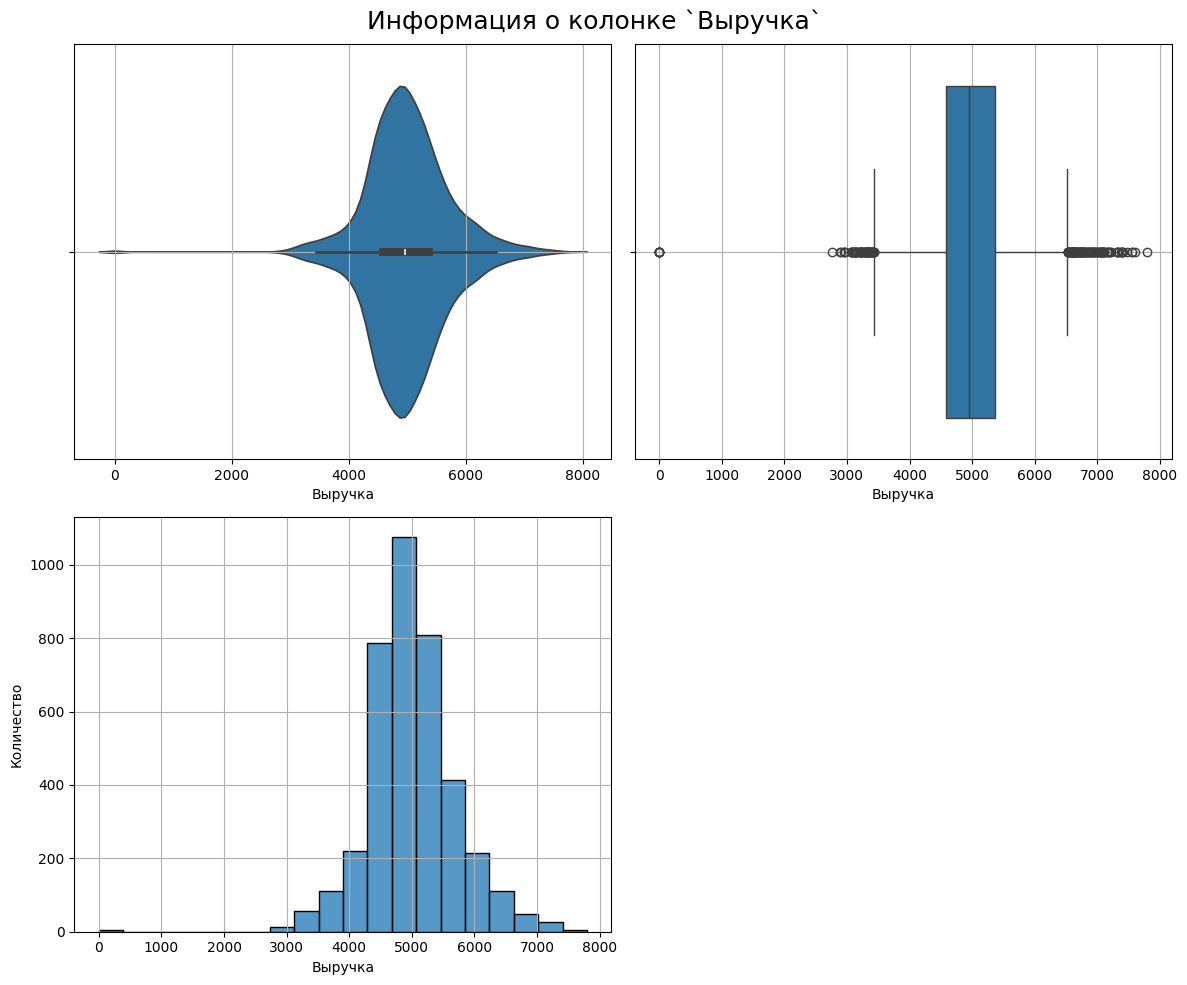

In [45]:
draw_plots_about_column(market_money, 'revenue', 'Выручка')

### 3.6. <a id='toc3_6_'></a>Промежуточный вывод по столбцу `market_money`     [&#8593;](#toc0_)

Датасет содержит информацию о выручке, которую магазин получает с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- Полные дубликаты отсутствуют
- Пропуски отсутствуют
- Выбросы удалены

## 4. <a id='toc4_'></a>Датасет `market_time`        [&#8593;](#toc0_)

In [46]:
# data is not presented due to copyright
market_time = pd.read_csv('')

In [47]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


### 4.1. <a id='toc4_1_'></a>Переименование колонок        [&#8593;](#toc0_)

In [48]:
market_time = market_time.rename(columns={
    'Период': 'period',
    'минут': 'minutes'
})

In [49]:
market_time.columns

Index(['id', 'period', 'minutes'], dtype='object')

### 4.2. <a id='toc4_2_'></a>Проверка пропусков     [&#8593;](#toc0_)

In [50]:
print_table_about_nans(market_time)

+---------+----------------------+
| Feature | Missing values count |
+---------+----------------------+
|    id   |      0 (0.00%)       |
|  period |      0 (0.00%)       |
| minutes |      0 (0.00%)       |
+---------+----------------------+


### 4.3. <a id='toc4_3_'></a>Проверка полных дубликатов     [&#8593;](#toc0_)

In [51]:
market_time.duplicated().sum()

0

### 4.4. <a id='toc4_4_'></a>Столбец `period`     [&#8593;](#toc0_)

In [52]:
market_time['period'].value_counts()

period
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64

Исправим опечатку.

In [53]:
market_time['period'] = market_time['period'].replace({
    'предыдцщий_месяц': 'предыдущий_месяц'
})

In [54]:
market_time['period'].value_counts()

period
текущий_месяц       1300
предыдущий_месяц    1300
Name: count, dtype: int64

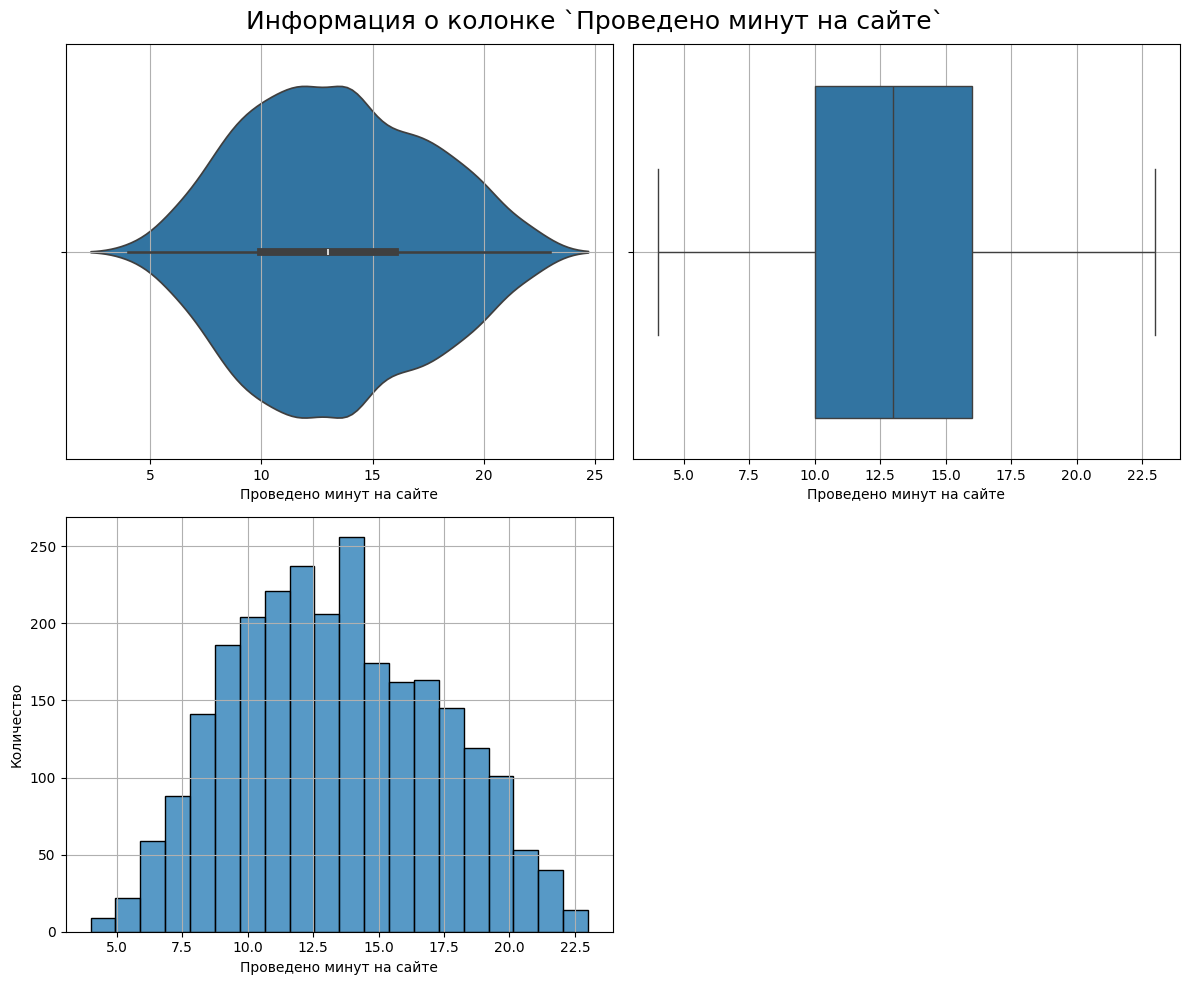

In [55]:
draw_plots_about_column(market_time, 'minutes', 'Проведено минут на сайте')

### 4.5. <a id='toc4_5_'></a>Промежуточный вывод о датасете `market_time`     [&#8593;](#toc0_)

Датасет содержит информацию о времени (в минутах), которое покупатель провел на сайте в течение периода

- Полные дубликаты отсутствуют
- Пропуски отсутствуют
- Исправлены опечатки
- Присутствуют как категориальные, так и числовые столбцы
- Выбросы отсутствуют

## 5. <a id='toc5_'></a>Датасет `money`        [&#8593;](#toc0_)

In [56]:
# data is not presented due to copyright
money = pd.read_csv('', sep=';', decimal=',')

In [57]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### 5.1. <a id='toc5_1_'></a>Переименование столбцов        [&#8593;](#toc0_)

In [58]:
money = money.rename(columns={
    'Прибыль': 'profit'
})

In [59]:
money.columns

Index(['id', 'profit'], dtype='object')

### 5.2. <a id='toc5_2_'></a>Проверка типов данных        [&#8593;](#toc0_)

In [60]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


### 5.3. <a id='toc5_3_'></a>Проверка полных дубликатов     [&#8593;](#toc0_)

In [61]:
money.duplicated().sum()

0

Установим столбец `id` как индекс.

In [62]:
money = money.set_index('id')

### 5.4. <a id='toc5_4_'></a>Изучение пропусков        [&#8593;](#toc0_)

In [63]:
print_table_about_nans(money)

+---------+----------------------+
| Feature | Missing values count |
+---------+----------------------+
|  profit |      0 (0.00%)       |
+---------+----------------------+


### 5.5. <a id='toc5_5_'></a>Столбец `profit`   [&#8593;](#toc0_)

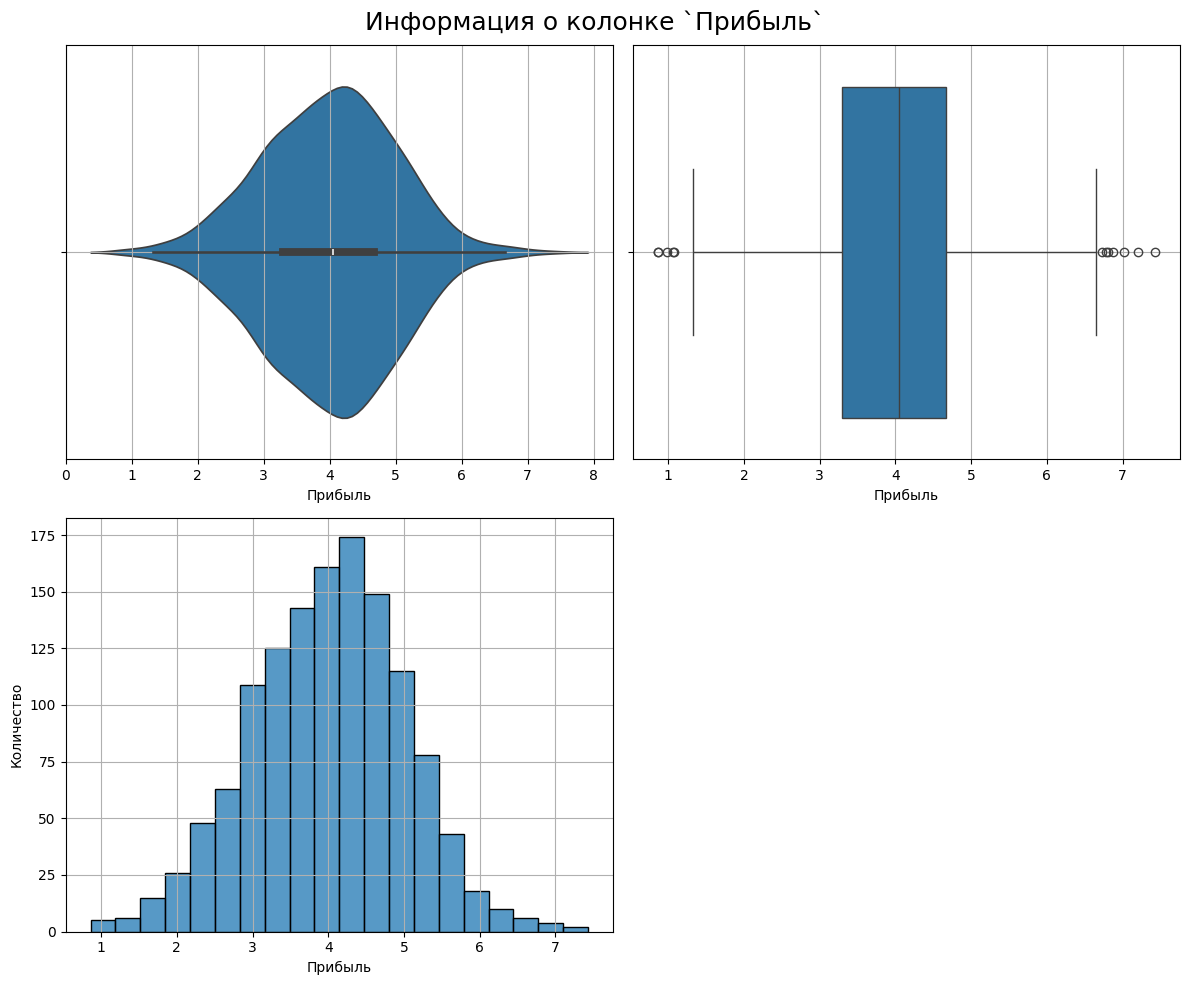

In [64]:
draw_plots_about_column(money, 'profit', 'Прибыль')

### 5.6. <a id='toc5_6_'></a>Вывод о датасете `money`  [&#8593;](#toc0_)

Датасет содержит информацию о среднемесячной прибыли от покупателя за последние 3 месяца. То есть какую прибыль получает магазин с продаж этому пользователю.

- Полные дубликаты отсутствуют
- Пропуски отсутствуют
- Выбросы отсутствуют
- Столбец прибыли имеет нормальное распределение

---

## 6. <a id='toc6_'></a>Преобразование таблиц     [&#8593;](#toc0_)

In [65]:
market_money = market_money.pivot_table(values='revenue', columns='period', index='id')
market_money = market_money.rename(columns={
    'предыдущий_месяц': 'money_1_month_ago',
    'препредыдущий_месяц': 'money_2_months_ago',
    'текущий_месяц': 'money_this_month' 
})
market_money.head()

period,money_1_month_ago,money_2_months_ago,money_this_month
id,,,
215348,0.00,0.00,3293.10
215349,5216.00,4472.00,4971.60
215350,5457.50,4826.00,5058.40
215351,6158.00,4793.00,6610.40
215352,5807.50,4594.00,5872.50


In [66]:
market_time = market_time.pivot_table(index='id', values='minutes', columns='period')
market_time = market_time.rename(columns={
    'предыдущий_месяц': 'time_1_month_ago',
    'текущий_месяц': 'time_this_month' 
})
market_time.head()

period,time_1_month_ago,time_this_month
id,,
215348,13.00,14.00
215349,12.00,10.00
215350,8.00,13.00
215351,11.00,13.00
215352,8.00,11.00


**Вывод:**  
На данном этапе таблицы были преобразованы к формату, более удобному для дальнейшего объединения.

## 7. <a id='toc7_'></a>Отбор клиентов     [&#8593;](#toc0_)

In [67]:
market_money.head()

period,money_1_month_ago,money_2_months_ago,money_this_month
id,,,
215348,0.00,0.00,3293.10
215349,5216.00,4472.00,4971.60
215350,5457.50,4826.00,5058.40
215351,6158.00,4793.00,6610.40
215352,5807.50,4594.00,5872.50


Отберем клиентов, которые активны каждый месяц. При этом текущий месяц еще может быть не закончен.

In [68]:
_mask = (market_money['money_1_month_ago'] == 0) | (market_money['money_2_months_ago'] == 0)
market_money[_mask]

period,money_1_month_ago,money_2_months_ago,money_this_month
id,,,
215348,0.00,0.00,3293.10
215357,0.00,0.00,5986.30
215359,0.00,0.00,4735.00


Найдено 3 клиента с невысокой покупательной активностью. Отбросим их.

In [69]:
market_money.shape

(1299, 3)

In [70]:
market_money = market_money[~_mask]

In [71]:
market_money.shape

(1296, 3)

**Вывод:**  
На данном этапе были выбраны клиенты, у которых покупательская активность сохраняется на протяжении 3х месяцев (учитывая, что этот месяц еще не закончился).

## 8. <a id='toc8_'></a>Объединение таблиц     [&#8593;](#toc0_)

In [72]:
market_file = market_file.set_index('id')

In [73]:
market = market_money.join([market_file, market_time], how='left').sort_index(axis=1)
market.head()

,categories_visited_per_session,days_after_registration,fail_number,is_mailing_allowed,marketing_activity_6_months,marketing_activity_current_month,money_1_month_ago,money_2_months_ago,money_this_month,most_popular_category,pages_per_session,purchasing_activity,sale_purchases_part,service_type,time_1_month_ago,time_this_month,unpaid_items_number
id,,,,,,,,,,,,,,,,,
215349,4,819,2,да,4.40,4,5216.00,4472.00,4971.60,Товары для детей,5,Снизилась,0.75,премиум,12.00,10.00,4
215350,5,539,1,нет,4.90,3,5457.50,4826.00,5058.40,Домашний текстиль,5,Снизилась,0.14,стандарт,8.00,13.00,2
215351,5,896,6,да,3.20,5,6158.00,4793.00,6610.40,Товары для детей,4,Снизилась,0.99,стандарт,11.00,13.00,0
215352,3,1064,3,нет,5.10,3,5807.50,4594.00,5872.50,Товары для детей,2,Снизилась,0.94,стандарт,8.00,11.00,2
215353,4,762,1,да,3.30,4,4738.50,5124.00,5388.50,Домашний текстиль,4,Снизилась,0.26,стандарт,10.00,10.00,1


In [74]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   categories_visited_per_session    1296 non-null   int64  
 1   days_after_registration           1296 non-null   int64  
 2   fail_number                       1296 non-null   int64  
 3   is_mailing_allowed                1296 non-null   object 
 4   marketing_activity_6_months       1296 non-null   float64
 5   marketing_activity_current_month  1296 non-null   int64  
 6   money_1_month_ago                 1296 non-null   float64
 7   money_2_months_ago                1296 non-null   float64
 8   money_this_month                  1296 non-null   float64
 9   most_popular_category             1296 non-null   object 
 10  pages_per_session                 1296 non-null   int64  
 11  purchasing_activity               1296 non-null   object 
 12  sale

In [75]:
num_cols = market.select_dtypes(include='number').columns.to_list()
display(num_cols)
cat_cols = market.select_dtypes(exclude='number').columns.to_list()
display(cat_cols)

['categories_visited_per_session',
 'days_after_registration',
 'fail_number',
 'marketing_activity_6_months',
 'marketing_activity_current_month',
 'money_1_month_ago',
 'money_2_months_ago',
 'money_this_month',
 'pages_per_session',
 'sale_purchases_part',
 'time_1_month_ago',
 'time_this_month',
 'unpaid_items_number']

['is_mailing_allowed',
 'most_popular_category',
 'purchasing_activity',
 'service_type']

**Вывод:**  
На данном этапе таблицы были объединены в одну для дальнейшего анализа. Также были выделены числовые и категориальные колонки.

## 9. <a id='toc9_'></a>Проверка корреляции     [&#8593;](#toc0_)

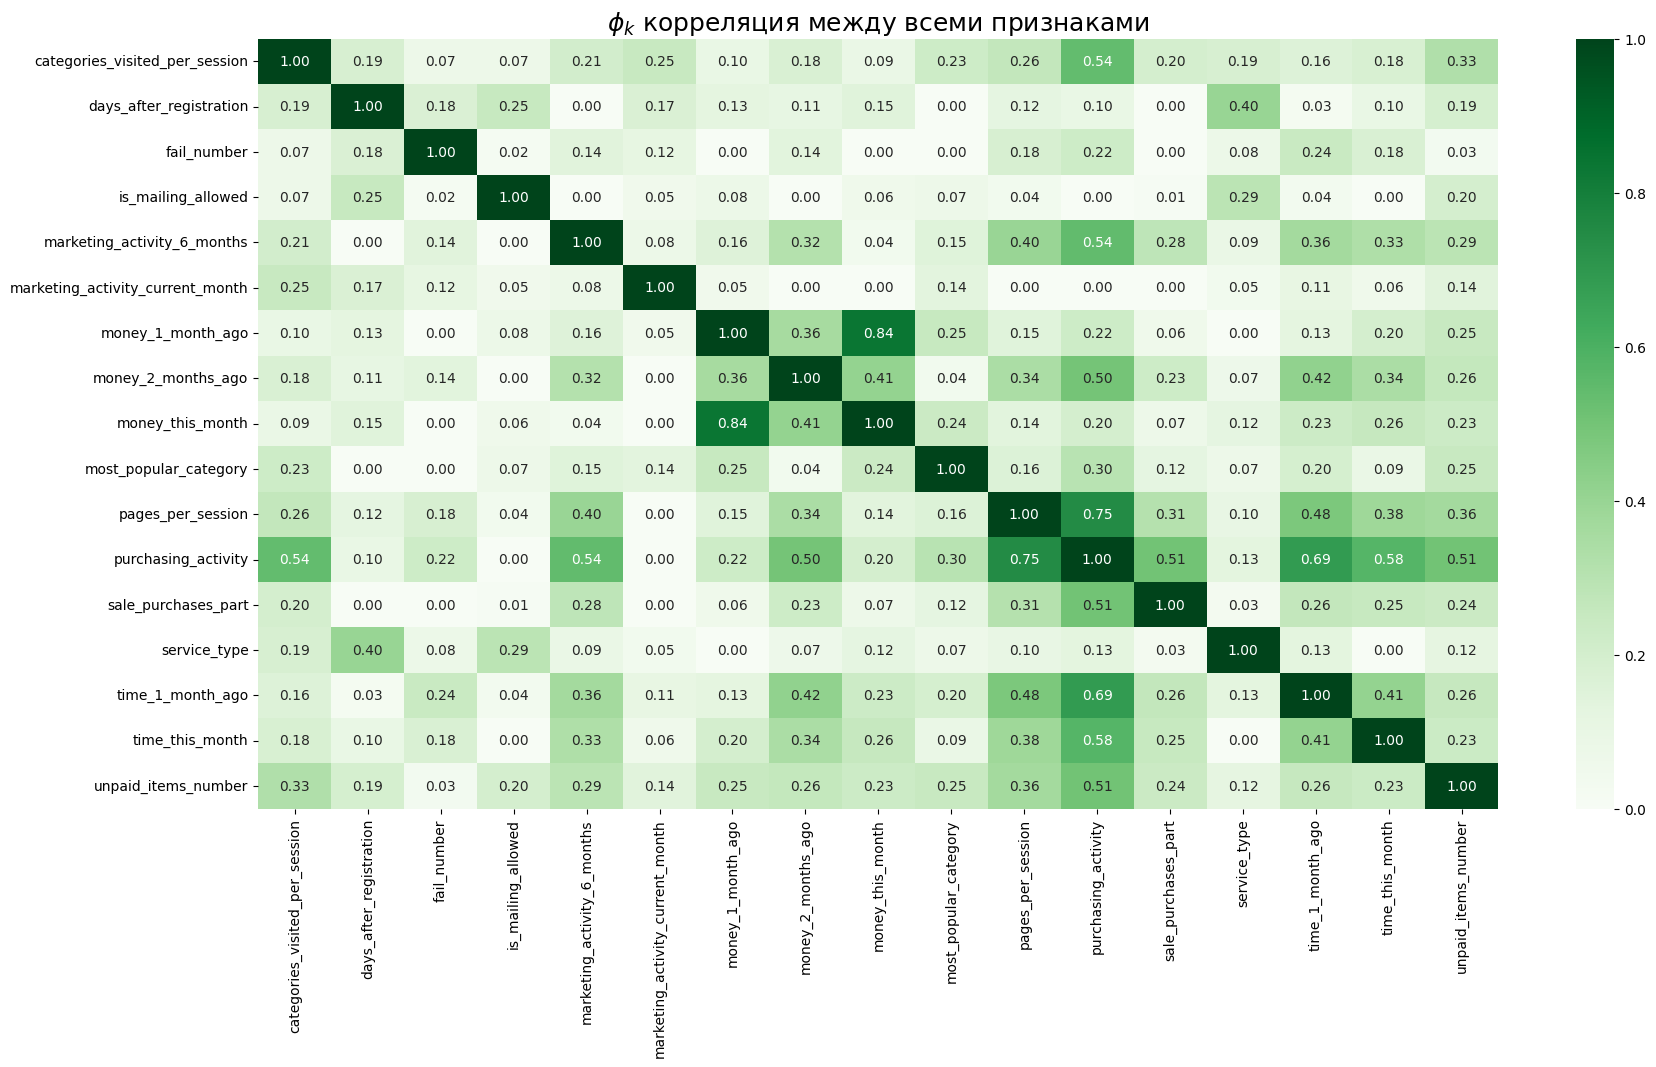

In [76]:
plt.figure(figsize=(20, 10))
sns.heatmap(market.phik_matrix(interval_cols=num_cols),
            cmap='Greens',
            annot=True,
            fmt='.2f');

plt.title(r'$\phi_k$ корреляция между всеми признаками', fontsize=18);

In [77]:
scaler = StandardScaler()
df_for_vif = pd.DataFrame(scaler.fit_transform(market[num_cols]), columns=num_cols)

with_constants = add_constant(df_for_vif)

vif_data = pd.DataFrame()
vif_data["Variable"] = with_constants.columns
vif_data["VIF"] = [variance_inflation_factor(with_constants.values, i) for i in range(with_constants.shape[1])]

vif_data.sort_values(by='VIF')

,Variable,VIF
0,const,1.00
5,marketing_activity_current_month,1.04
3,fail_number,1.08
2,days_after_registration,1.10
1,categories_visited_per_session,1.18
10,sale_purchases_part,1.19
13,unpaid_items_number,1.20
4,marketing_activity_6_months,1.22
12,time_this_month,1.32
9,pages_per_session,1.42


После проведения корреляционного анализа можно сделать следующие выводы:
- Наблюдается сильная корреляция между столбцами `money_this_month` `money_1_month_ago`, однако назвать это мультиколлинеарностью нельзя.
- Целевой признак имеет высокую линейную корреляцию с признаком `pages_per_session`
- Целевой признак не имеет слишком высокой корреляции ни с одним из других признаков.

## 10. <a id='toc10_'></a>Предобработка и Модели     [&#8593;](#toc0_)

### 10.1. <a id='toc10_1_'></a>Разделение данных     [&#8593;](#toc0_)

In [78]:
target = 'purchasing_activity'

X = market.drop(target, axis=1)
y = market[target]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    test_size=TEST_SIZE,
    stratify=y
)

In [80]:
y_train[:5]

id
216417    Прежний уровень
215710          Снизилась
215852    Прежний уровень
216479    Прежний уровень
216029    Прежний уровень
Name: purchasing_activity, dtype: object

In [81]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [82]:
label_encoder.classes_

array(['Прежний уровень', 'Снизилась'], dtype=object)

In [83]:
y_train[:5]

array([0, 1, 0, 0, 0])

---

In [84]:
X_train.head()

,categories_visited_per_session,days_after_registration,fail_number,is_mailing_allowed,marketing_activity_6_months,marketing_activity_current_month,money_1_month_ago,money_2_months_ago,money_this_month,most_popular_category,pages_per_session,sale_purchases_part,service_type,time_1_month_ago,time_this_month,unpaid_items_number
id,,,,,,,,,,,,,,,,
216417,2,485,7,да,4.60,3,4163.50,4486.00,4014.00,Мелкая бытовая техника и электроника,13,0.23,премиум,20.00,11.00,5
215710,3,658,2,да,3.50,3,4052.00,4402.00,3821.90,Товары для детей,5,0.98,премиум,7.00,14.00,0
215852,5,478,4,да,5.80,3,5629.00,4837.00,6445.40,Домашний текстиль,8,0.24,стандарт,14.00,7.00,5
216479,3,219,3,нет,4.40,3,5466.00,5253.00,5780.60,Домашний текстиль,4,0.15,стандарт,20.00,10.00,3
216029,4,370,4,да,3.90,5,4188.00,4837.00,4880.90,Товары для детей,11,0.16,стандарт,17.00,15.00,2


In [85]:
ohe_cols = [
    'most_popular_category',
    'is_mailing_allowed'
]


ord_cols = [
    'service_type'
]


num_cols = [
    'categories_visited_per_session',
    'days_after_registration',
    'fail_number',
    'marketing_activity_6_months',
    'marketing_activity_current_month',
    'money_1_month_ago',
    'money_2_months_ago',
    'money_this_month',
    'pages_per_session',
    'sale_purchases_part',
    'time_1_month_ago',
    'time_this_month',
    'unpaid_items_number'
]

### 10.2. <a id='toc10_2_'></a>Пайплайны     [&#8593;](#toc0_)

In [86]:
ohe_pipeline = Pipeline(
    [
        (
            'SimpleImputer_before_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [87]:
ord_pipeline = Pipeline(
    [
        (
            'SimpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ],
                unknown_value=np.nan,
                handle_unknown='use_encoded_value'
            )
        ),
        (
            'SimpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
    ]
)

In [88]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipeline, ohe_cols),
        ('ord', ord_pipeline, ord_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

In [89]:
final_pipeline = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [90]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,  5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(
            penalty='l1',
            solver='liblinear',
            random_state=RANDOM_STATE
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            kernel='linear',
            probability=True)],
        'models__C': [0.01, 0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

В качестве метрики выберем `roc_auc`, так как наблюдается дисбаланс в распределении целевого признака.

In [91]:
grid = GridSearchCV(
    final_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

In [92]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('SimpleImputer_before_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['most_popular_category',
                                                                          'is_mailing_allowed']),
                                                                        ('ord',
                                                                         Pipel...
                         {'models': [LogisticRegression(penalty='l1',
                                                        random_state=27,
                                                        solver='liblinear')],
                          'models__C': range(1, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [SVC(kernel='linear', probability=True,
                                         random_state=27)],
                          'models__C': [0.01, 0.1, 1, 10, 100],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [93]:
round(grid.best_score_, 4)

0.9026

In [94]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__max_depth,param_models__max_features,param_preprocessor__num,param_models__n_neighbors,param_models__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
65,0.07,0.00,0.01,0.00,"SVC(kernel='linear', probability=True, random_state=27)",NaN,NaN,MinMaxScaler(),NaN,0.01,"{'models': SVC(kernel='linear', probability=True, random_state=27), 'models__C': 0.01, 'preprocessor__num': MinMaxScaler()}",0.93,0.92,0.90,0.86,0.91,0.90,0.02,1
69,0.05,0.00,0.00,0.00,"SVC(kernel='linear', probability=True, random_state=27)",NaN,NaN,MinMaxScaler(),NaN,0.10,"{'models': SVC(kernel='linear', probability=True, random_state=27), 'models__C': 0.1, 'preprocessor__num': MinMaxScaler()}",0.93,0.92,0.90,0.86,0.91,0.90,0.02,2
54,0.01,0.00,0.00,0.00,"LogisticRegression(penalty='l1', random_state=27, solver='liblinear')",NaN,NaN,RobustScaler(),NaN,2.00,"{'models': LogisticRegression(penalty='l1', random_state=27, solver='liblinear'), 'models__C': 2, 'preprocessor__num': RobustScaler()}",0.93,0.92,0.90,0.86,0.91,0.90,0.02,3
58,0.01,0.00,0.00,0.00,"LogisticRegression(penalty='l1', random_state=27, solver='liblinear')",NaN,NaN,RobustScaler(),NaN,3.00,"{'models': LogisticRegression(penalty='l1', random_state=27, solver='liblinear'), 'models__C': 3, 'preprocessor__num': RobustScaler()}",0.93,0.92,0.90,0.86,0.91,0.90,0.02,4
62,0.01,0.00,0.00,0.00,"LogisticRegression(penalty='l1', random_state=27, solver='liblinear')",NaN,NaN,RobustScaler(),NaN,4.00,"{'models': LogisticRegression(penalty='l1', random_state=27, solver='liblinear'), 'models__C': 4, 'preprocessor__num': RobustScaler()}",0.92,0.92,0.90,0.86,0.91,0.90,0.02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.01,0.00,0.00,0.00,DecisionTreeClassifier(random_state=27),2.00,2.00,StandardScaler(),NaN,NaN,"{'models': DecisionTreeClassifier(random_state=27), 'models__max_depth': 2, 'models__max_features': 2, 'preprocessor__num': StandardScaler()}",0.86,0.76,0.80,0.78,0.79,0.80,0.03,78
3,0.01,0.00,0.00,0.00,DecisionTreeClassifier(random_state=27),2.00,2.00,passthrough,NaN,NaN,"{'models': DecisionTreeClassifier(random_state=27), 'models__max_depth': 2, 'models__max_features': 2, 'preprocessor__num': 'passthrough'}",0.86,0.76,0.80,0.78,0.79,0.80,0.03,78
43,0.01,0.00,0.01,0.01,KNeighborsClassifier(),NaN,NaN,passthrough,3.00,NaN,"{'models': KNeighborsClassifier(), 'models__n_neighbors': 3, 'preprocessor__num': 'passthrough'}",0.72,0.77,0.73,0.73,0.76,0.74,0.02,82
47,0.01,0.00,0.00,0.00,KNeighborsClassifier(),NaN,NaN,passthrough,4.00,NaN,"{'models': KNeighborsClassifier(), 'models__n_neighbors': 4, 'preprocessor__num': 'passthrough'}",0.72,0.78,0.72,0.71,0.78,0.74,0.03,83


In [95]:
y_pred = grid.predict_proba(X_test)[:, 1]
round(roc_auc_score(y_test, y_pred), 4)

0.9048

### 10.3. <a id='toc10_3_'></a>Вывод  [&#8593;](#toc0_)

В данном разделе данные были преобразованы с помощью различных инструментов:
- Целевой признак закодирован с помощью `LabelEncoder`
- Категориальные признаки закодированы с помощью `OneHotEncoder` и `OrdinalEncoder`
- Пропуски заполнены с помощью `SimpleImputer`
- Числовые данные преобразованы с помощью инструментов (`MinMaxScaler`, `StandardScaler`, `RobustScaler`) или оставлены без изменений в зависимости от модели.

Использованы пайплайны и GridSearch для поиска оптимальной модели и оптимальных гиперпараметров для нее.

В качестве метрики была выбрана `roc_auc_score`, так как наблюдается некоторый диcбаланс в распределении целевого признака.

В результате, моделью с наибольшей метрикой оказалась `SVC` (roc_auc=`0.9026`).

## 11. <a id='toc11_'></a>Анализ важности признаков     [&#8593;](#toc0_)

In [96]:
best_model = grid.best_estimator_.named_steps['models']

In [97]:
X_train_transformed = grid.best_estimator_.named_steps['preprocessor'].transform(X_train)

In [98]:
feature_names = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

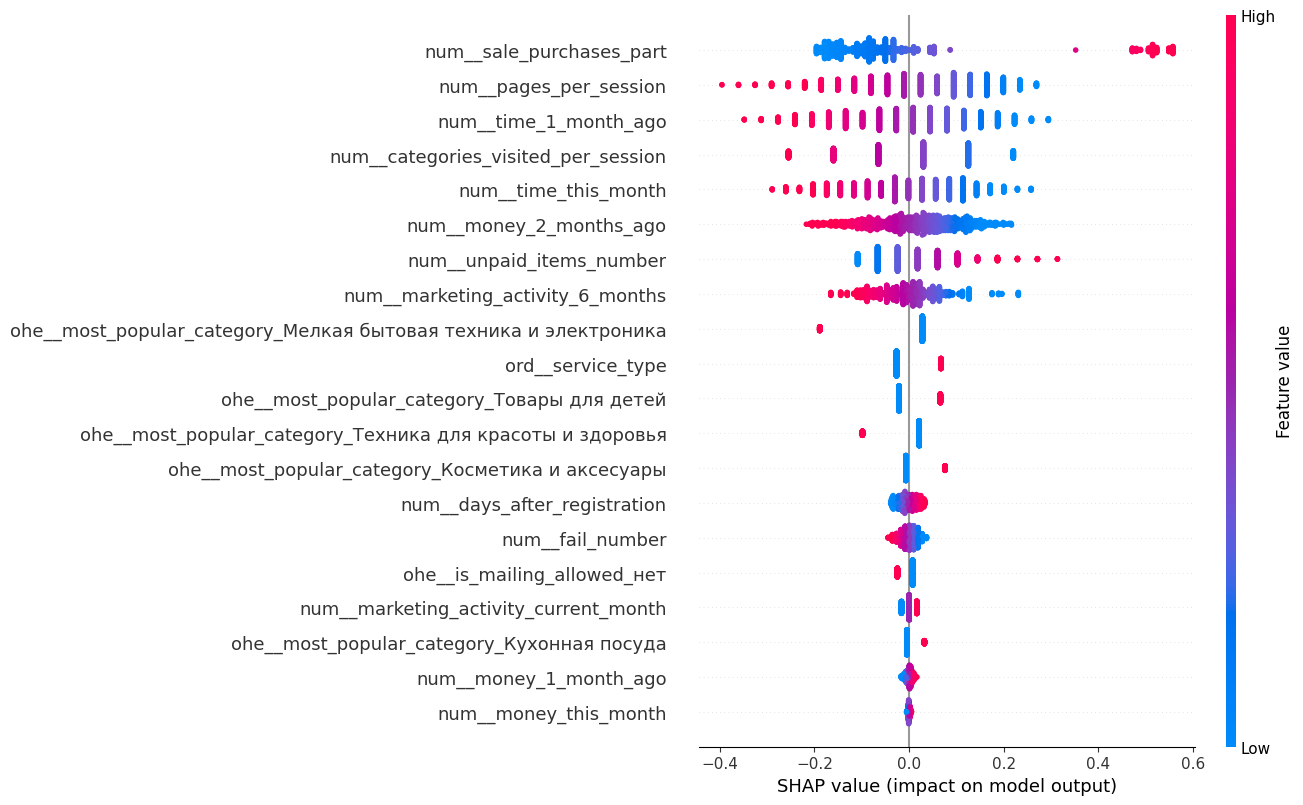

In [99]:
explainer = shap.LinearExplainer(
    best_model,
    X_train_transformed,
    feature_names=feature_names
)
shap_values = explainer(X_train_transformed)
shap.plots.beeswarm(shap_values, max_display=None)

В результате проведенного анализа можно сделать вывод о том, что наибольший вклад имеют следующие столбцы:
- `sale_purchases_part` (доля покупок по акции): чем больше эта доля, чем выше шанс снижения покупательской активности (далее ПА)
- Количество посещенных страниц и категорий, а также время, проведенное на сайте, ожидаемо имеет прямую обратную зависимость с шансом снижения ПА. Чем больше времени пользователь на сайте - тем больше вероятность, что он и дальше будет покупать.
- Количество неоплаченных товаров ожидаемо имеет прямую зависимость со снижением ПА.

## 12. <a id='toc12_'></a>Сегментация покупателей     [&#8593;](#toc0_)

In [100]:
df_data = grid.best_estimator_.named_steps['preprocessor'].transform(X)
df = X.copy()

df['prob_to_leave'] = best_model.predict_proba(df_data)[:, 1]
df['leave'] = label_encoder.transform(y)
df = df.join(money, how='left')

df.head()

,categories_visited_per_session,days_after_registration,fail_number,is_mailing_allowed,marketing_activity_6_months,marketing_activity_current_month,money_1_month_ago,money_2_months_ago,money_this_month,most_popular_category,pages_per_session,sale_purchases_part,service_type,time_1_month_ago,time_this_month,unpaid_items_number,prob_to_leave,leave,profit
id,,,,,,,,,,,,,,,,,,,
215349,4,819,2,да,4.40,4,5216.00,4472.00,4971.60,Товары для детей,5,0.75,премиум,12.00,10.00,4,0.98,1,4.16
215350,5,539,1,нет,4.90,3,5457.50,4826.00,5058.40,Домашний текстиль,5,0.14,стандарт,8.00,13.00,2,0.28,1,3.13
215351,5,896,6,да,3.20,5,6158.00,4793.00,6610.40,Товары для детей,4,0.99,стандарт,11.00,13.00,0,0.95,1,4.87
215352,3,1064,3,нет,5.10,3,5807.50,4594.00,5872.50,Товары для детей,2,0.94,стандарт,8.00,11.00,2,0.99,1,4.21
215353,4,762,1,да,3.30,4,4738.50,5124.00,5388.50,Домашний текстиль,4,0.26,стандарт,10.00,10.00,1,0.61,1,3.95


Выделим вероятность снижения ПА `0.7` как высокую. В качестве границы прибыли (столбец `profit`) возьмем значение `3`.

*Если честно, я не знаю, как тут аргументировать особо)*

In [101]:
_mask = (df['prob_to_leave'] >= 0.7) & (df['profit'] >= 3)
to_analyze = df[_mask]
rest = df[~_mask]

In [102]:
len(to_analyze)

336

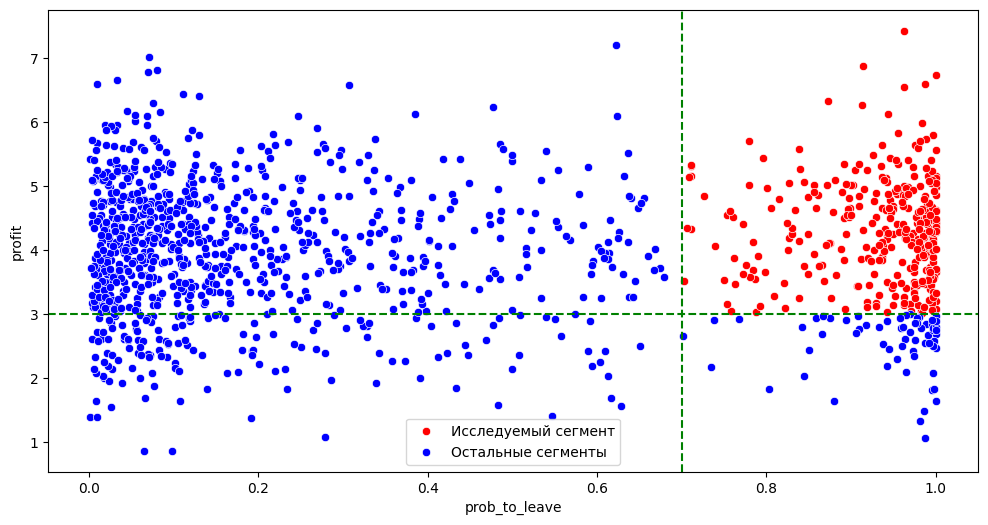

In [103]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=to_analyze, x='prob_to_leave', y='profit', label='Исследуемый сегмент', color='red')
sns.scatterplot(data=rest, x='prob_to_leave', y='profit', label='Остальные сегменты', color='blue')
plt.axvline(x=0.7, color='green', linestyle='--')
plt.axhline(y=3, color='green', linestyle='--')
plt.legend()
plt.show()

SHAP анализ выявил, что высокое значение в столбце `sale_purchases_part` (часть покупок по акции) часто означает высокую вероятность уйти. Проверим это дополнительно.

In [104]:
_mask = to_analyze['sale_purchases_part'] >= 0.7
with_sales = to_analyze[_mask]
no_sales = to_analyze[~_mask]

In [105]:
print(len(with_sales), len(no_sales))

113 223


In [106]:
print(f' Mean prob to leave for users who OFTEN buy on sales: {with_sales['prob_to_leave'].mean():.2f}')
print(f'Mean prob to leave for users who SELDOM buy on sales: {no_sales['prob_to_leave'].mean():.2f}')

 Mean prob to leave for users who OFTEN buy on sales: 0.97
Mean prob to leave for users who SELDOM buy on sales: 0.91


Как мы видим, вероятность уйти на 8 п.п. выше для пользователей, которые чаще покупают по акциям. Исследуем различия между этими категориями пользователей.

In [107]:
pd.DataFrame({
    'with_sales': with_sales.mean(numeric_only=True),
    'no_sales': no_sales.mean(numeric_only=True)
})

,with_sales,no_sales
categories_visited_per_session,2.65,2.39
days_after_registration,587.73,644.64
fail_number,4.02,3.84
marketing_activity_6_months,3.60,3.51
marketing_activity_current_month,3.96,4.06
money_1_month_ago,4878.72,5009.44
money_2_months_ago,4636.63,4590.97
money_this_month,5202.93,5395.32
pages_per_session,4.83,4.30
sale_purchases_part,0.94,0.30


---

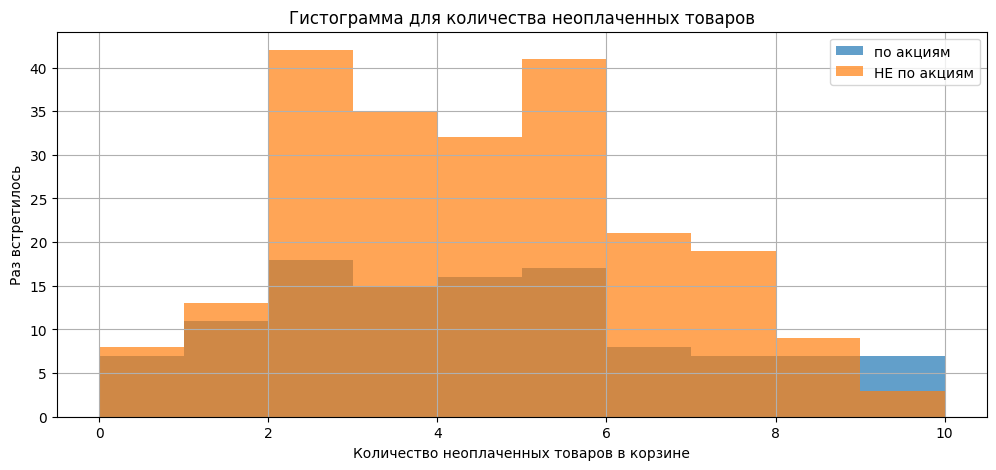

In [108]:
plt.figure(figsize=(12, 5))
plt.hist(with_sales['unpaid_items_number'], alpha=0.7, label='по акциям')
plt.hist(no_sales['unpaid_items_number'], alpha=0.7, label='НЕ по акциям')
plt.title('Гистограмма для количества неоплаченных товаров')
plt.xlabel('Количество неоплаченных товаров в корзине')
plt.ylabel('Раз встретилось')
plt.legend()
plt.grid()
plt.show()

По графику можно сделать вывод, что количество неоплаченных товаров выше у людей, которые чаще покупают по акции. Скорее всего, люди не успели купить товар по скидке и не купили вообще.

### 12.1. <a id='toc12_1_'></a>Вывод по сегментации     [&#8593;](#toc0_)

Был выбран сегмент пользователей с крайне высокой долей покупок по акции и наиболее высокой вероятностью уйти.

Можно выделить следующую рекомендацию:
- Наблюдается довольно большое количество неоплаченных товаров в корзине у пользователей с НПА. Предполагаю, что пользователи не успели купить эти товары по акции. Можно предложить скидку на них.

## 13. <a id='toc13_'></a>Общий вывод     [&#8593;](#toc0_)

В рамках данного проекта были предложены данные о пользователях интернет-магазина. Для начала данные были загружены, проанализированы и обработаны: удалены опечатки, проверены полные дубликаты, удалены выбросы и т.д. Далее датасеты были преобразованы и объединены для удобства дальнейшего анализа.

Следующим шагом с помощью пайплайнов и инструмента `GridSearchCV` были найдены наиболее оптимальные способы подготовки (кодирование, нормализация) данных и наиболее подходящая модель.

В качестве метрики была выбрана `roc_auc` в виду дисбаланса в распределении целевого признака.

В результате была выбрана модель `SVC`, которая обеспечивает более чем `90%` значении метрики.

На финальном этапе была разработана модель для предсказания вероятности снижения покупательской активности (ПА) у пользователей.

Также была проведена сегментация пользователей, выделен сегмент пользователей с максимальной долей покупок по акции и высокой вероятностью снижения ПА. Для данного сегмента рекомендуется следующее:
- Наблюдается довольно большое количество неоплаченных товаров в корзине у пользователей с НПА. Предполагаю, что пользователи не успели купить эти товары по акции. Можно предложить скидку на них.
